In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

from sklearn.linear_model import RidgeCV
%matplotlib inline
import scipy.stats as stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [12]:
# Load data
df = pd.read_csv('MERGED2016_17_PP.csv')
df_endow = pd.read_csv('NCSE2017 Endowment Markets Values for Media--Final January 31 2018.csv')
top_50 = pd.read_csv('top_50.csv')

/anaconda3/envs/metis/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408,1431,1432,1503,1504,1517,1518,1519,1529,1530,1531,1532,1534,1535,1537,1538,1539,1540,1542,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600,1601,1602,1606,1610,1611,1614,1615,1616,1708,1729,1909,1910,1911,1912,1913) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
df_endow.columns = df_endow.columns.map(str.strip)

In [14]:
df_endow.columns

Index(['Rank', 'UNITID', 'Institution Name', 'City', 'State',
       'FY2017 Endowment (in $1,000s)', 'FY2016 Endowment (in $1,000s)',
       'Change in Market Value (%)2',
       'Fall 2016 Full-time Equivalent (FTE) Students3',
       'FY2017 Endowment Value per FTE Student ($)', 'IPEDS Sector4',
       'IPEDS HBCU Indicator5', 'IPEDS Carnegie Classification6',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'],
      dtype='object')

In [15]:
df = pd.merge(df,df_endow[['UNITID','FY2017 Endowment Value per FTE Student ($)']],on='UNITID', how='left')

In [16]:
df = pd.merge(df,top_50[['INSTNM','top_50']],on='INSTNM', how='left')

In [17]:
df.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRYP_FULLTIME_POOLED_SUPP,OMENRAP_FULLTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP,FY2017 Endowment Value per FTE Student ($),top_50
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10416.07,NaN
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7175 entries, 0 to 7174
Columns: 1979 entries, UNITID to top_50
dtypes: float64(1778), int64(11), object(190)
memory usage: 108.4+ MB


In [19]:
df.columns

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'ACCREDAGENCY', 'INSTURL', 'NPCURL',
       ...
       'OMENRYP_FULLTIME_POOLED_SUPP', 'OMENRAP_FULLTIME_POOLED_SUPP',
       'OMAWDP8_FULLTIME_POOLED_SUPP', 'OMENRUP_FULLTIME_POOLED_SUPP',
       'OMENRYP_PARTTIME_POOLED_SUPP', 'OMENRAP_PARTTIME_POOLED_SUPP',
       'OMAWDP8_PARTTIME_POOLED_SUPP', 'OMENRUP_PARTTIME_POOLED_SUPP',
       'FY2017 Endowment Value per FTE Student ($)', 'top_50'],
      dtype='object', length=1979)

In [20]:
#Strip any spaces in column names
df.columns = df.columns.map(str.strip)
df.columns

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'ACCREDAGENCY', 'INSTURL', 'NPCURL',
       ...
       'OMENRYP_FULLTIME_POOLED_SUPP', 'OMENRAP_FULLTIME_POOLED_SUPP',
       'OMAWDP8_FULLTIME_POOLED_SUPP', 'OMENRUP_FULLTIME_POOLED_SUPP',
       'OMENRYP_PARTTIME_POOLED_SUPP', 'OMENRAP_PARTTIME_POOLED_SUPP',
       'OMAWDP8_PARTTIME_POOLED_SUPP', 'OMENRUP_PARTTIME_POOLED_SUPP',
       'FY2017 Endowment Value per FTE Student ($)', 'top_50'],
      dtype='object', length=1979)

In [21]:
df.shape

(7175, 1979)

In [22]:
subset=['INSTNM','STABBR','ADM_RATE_ALL',
        'ICLEVEL','PCTPELL','AGE_ENTRY','FIRST-GEN','PCIP42',
        'PCIP04','PCIP13','PCIP15','PCIP22','PCIP27','PCIP41','PCIP50','PCIP51','NPT4_PUB',
        'PCIP52','TUITIONFEE_IN','TUITIONFEE_OUT','SAT_AVG_ALL','PAR_ED_PCT_1STGEN','DEBT_MDN','FY2017 Endowment Value per FTE Student ($)','top_50']

loan_df = df.filter(subset, axis=1)

In [23]:
loan_df.shape

(7175, 24)

In [24]:
loan_df.head()

,INSTNM,STABBR,ADM_RATE_ALL,ICLEVEL,PCTPELL,AGE_ENTRY,PCIP42,PCIP04,PCIP13,PCIP15,...,PCIP51,NPT4_PUB,PCIP52,TUITIONFEE_IN,TUITIONFEE_OUT,SAT_AVG_ALL,PAR_ED_PCT_1STGEN,DEBT_MDN,FY2017 Endowment Value per FTE Student ($),top_50
0,Alabama A & M University,AL,0.873775,1,0.7039,20.283741368,0.0472,0.0071,0.1132,0.0472,...,0.0000,15567.0,0.1863,9366.0,17496.0,849.0,0.3658280922,13246,10416.07,NaN
1,University of Alabama at Birmingham,AL,0.581351,1,0.3525,23.60797466,0.0766,0.0000,0.0748,0.0000,...,0.2500,16475.0,0.2072,8040.0,18368.0,1125.0,0.341223671,14979.5,NaN,NaN
2,Amridge University,AL,NaN,1,0.6971,33.672297297,0.0000,0.0000,0.0000,0.0000,...,0.0000,NaN,0.3556,7180.0,7180.0,NaN,0.5125,10430,NaN,NaN
3,University of Alabama in Huntsville,AL,0.762816,1,0.2949,22.727919632,0.0160,0.0000,0.0282,0.0000,...,0.1911,19423.0,0.2250,9842.0,20612.0,1257.0,0.3101321586,13522,NaN,NaN
4,Alabama State University,AL,0.458964,1,0.7815,20.130990415,0.0503,0.0000,0.1364,0.0000,...,0.1429,15037.0,0.0974,9220.0,16156.0,825.0,0.3434343434,15738,NaN,NaN


In [25]:
#Taking values in the public column and turning into a boolean, 1 for public and 0 for private
loan_df['NPT4_PUB'] = loan_df['NPT4_PUB'].where(loan_df['NPT4_PUB'].isnull(), 1).fillna(0).astype(int)

In [26]:
four_vs_two_year_df = pd.get_dummies(loan_df['ICLEVEL'])

In [27]:
loan_df = pd.concat([loan_df, four_vs_two_year_df], axis=1)

In [28]:
#renmaing percentage of degrees awarded in a few subjects and Endowment
loan_df.rename(
    inplace=True,
    columns={
        'PCIP42': 'PCPSYCH',
        'PCIP04': "PCARCH",
        'PCIP13': 'PCEDU',
        'PCIP15': 'PCENG_TECH',
        'PCIP22': 'PCLEGAL',
        'PCIP27': 'PCMATH',
        'PCIP41': 'PCSCI',
        'PCIP50': 'PCART',
        'PCIP51': 'PCHEALTH',
        'PCIP52': 'PCBUS',
        'NPT4_PUB':'PUB_PRIV',
        'FY2017 Endowment Value per FTE Student ($)': 'ENDOWSTUD',
        1: 'FOUR_YEAR_INST',
        2: 'TWO_YEAR_INST',
        3: 'LESS_THAN_TWO_YEAR_INST'
    })

In [29]:
loan_df.head(10)

,INSTNM,STABBR,ADM_RATE_ALL,ICLEVEL,PCTPELL,AGE_ENTRY,PCPSYCH,PCARCH,PCEDU,PCENG_TECH,...,TUITIONFEE_IN,TUITIONFEE_OUT,SAT_AVG_ALL,PAR_ED_PCT_1STGEN,DEBT_MDN,ENDOWSTUD,top_50,FOUR_YEAR_INST,TWO_YEAR_INST,LESS_THAN_TWO_YEAR_INST
0,Alabama A & M University,AL,0.873775,1,0.7039,20.283741368,0.0472,0.0071,0.1132,0.0472,...,9366.0,17496.0,849.0,0.3658280922,13246,10416.07,NaN,1,0,0
1,University of Alabama at Birmingham,AL,0.581351,1,0.3525,23.60797466,0.0766,0.0000,0.0748,0.0000,...,8040.0,18368.0,1125.0,0.341223671,14979.5,NaN,NaN,1,0,0
2,Amridge University,AL,NaN,1,0.6971,33.672297297,0.0000,0.0000,0.0000,0.0000,...,7180.0,7180.0,NaN,0.5125,10430,NaN,NaN,1,0,0
3,University of Alabama in Huntsville,AL,0.762816,1,0.2949,22.727919632,0.0160,0.0000,0.0282,0.0000,...,9842.0,20612.0,1257.0,0.3101321586,13522,NaN,NaN,1,0,0
4,Alabama State University,AL,0.458964,1,0.7815,20.130990415,0.0503,0.0000,0.1364,0.0000,...,9220.0,16156.0,825.0,0.3434343434,15738,NaN,NaN,1,0,0
5,The University of Alabama,AL,0.525852,1,0.1938,21.137701396,0.0360,0.0000,0.0782,0.0000,...,10470.0,26950.0,1202.0,0.2257126887,17340,NaN,NaN,1,0,0
6,Central Alabama Community College,AL,NaN,2,0.5109,23.071028037,0.0000,0.0000,0.0000,0.1025,...,4380.0,7890.0,NaN,0.5496760259,5764,NaN,NaN,0,1,0
7,Athens State University,AL,NaN,1,0.4219,30.384765625,0.0308,0.0000,0.2192,0.0000,...,NaN,NaN,NaN,0.4774964838,13461,NaN,NaN,1,0,0
8,Auburn University at Montgomery,AL,0.765921,1,0.4405,22.199804114,0.0668,0.0000,0.0584,0.0000,...,9640.0,20710.0,1009.0,0.38189609,10750,NaN,NaN,1,0,0
9,Auburn University,AL,0.805434,1,0.1532,20.516795866,0.0330,0.0226,0.0941,0.0000,...,10696.0,28840.0,1217.0,0.1726471191,17000,29092.46,NaN,1,0,0


In [30]:
# total number of missing values 
np.count_nonzero(loan_df.isnull())

39171

In [31]:
# total number of columns with missing values
np.count_nonzero(np.any(loan_df.isnull(), axis = 0))

20

In [32]:
#replacing 'PrivacySuppressed' entries with Nan values
objects=['DEBT_MDN','AGE_ENTRY', 'PAR_ED_PCT_1STGEN']
for o in objects:
    loan_df[o].replace(to_replace =['PrivacySuppressed'], value = np.nan , inplace=True)

In [33]:
# find column names with nan values 
null_columns = loan_df.columns[loan_df.isnull().any()]
loan_df[null_columns].isnull().sum()

ADM_RATE_ALL         4949
PCTPELL               748
AGE_ENTRY             336
PCPSYCH               730
PCARCH                730
PCEDU                 730
PCENG_TECH            730
PCLEGAL               730
PCMATH                730
PCSCI                 730
PCART                 730
PCHEALTH              730
PCBUS                 730
TUITIONFEE_IN        3111
TUITIONFEE_OUT       3330
SAT_AVG_ALL          5748
PAR_ED_PCT_1STGEN    1129
DEBT_MDN              993
ENDOWSTUD            6420
top_50               7148
dtype: int64

In [34]:
#deleting rows in columns with Nan values
loan_df.dropna(subset = ['ADM_RATE_ALL','SAT_AVG_ALL','DEBT_MDN','PAR_ED_PCT_1STGEN','PCTPELL','TUITIONFEE_IN'], inplace=True)

In [35]:
loan_df.shape

(1305, 27)

In [36]:
#stripping all whitespace strings in dataframe
loan_df = loan_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [37]:
#convert objects to floats
convert_dict = {'DEBT_MDN': float, 
                'AGE_ENTRY': float,
                'PAR_ED_PCT_1STGEN': float,
                'ENDOWSTUD': float
               } 
  
loan_df = loan_df.astype(convert_dict)

In [38]:
loan_df['ENDOWSTUD'].fillna(0, inplace = True) 

In [39]:
loan_df['top_50'].fillna(0, inplace = True) 

In [40]:
# find column names with nan values 
null_columns = loan_df.columns[loan_df.isnull().any()]
loan_df[null_columns].isnull().sum()

Series([], dtype: float64)

In [41]:
top_15_schools_with_endowment = loan_df.groupby(['INSTNM'])['ENDOWSTUD'].sum().sort_values(ascending = False).head(15)
print(top_15_schools_with_endowment)

INSTNM
Princeton University                     2951077.11
Yale University                          2191267.54
Stanford University                      1541160.49
Harvard University                       1522103.85
Pomona College                           1321353.28
Massachusetts Institute of Technology    1315750.97
Amherst College                          1255243.16
Swarthmore College                       1207864.11
Williams College                         1188428.82
Grinnell College                         1119716.40
Rice University                           872777.58
Wellesley College                         807322.45
Dartmouth College                         782398.42
University of Notre Dame                  762463.39
Berea College                             702295.67
Name: ENDOWSTUD, dtype: float64


In [42]:
loan_df.shape

(1305, 27)

In [43]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1305 entries, 0 to 6734
Data columns (total 27 columns):
INSTNM                     1305 non-null object
STABBR                     1305 non-null object
ADM_RATE_ALL               1305 non-null float64
ICLEVEL                    1305 non-null int64
PCTPELL                    1305 non-null float64
AGE_ENTRY                  1305 non-null float64
PCPSYCH                    1305 non-null float64
PCARCH                     1305 non-null float64
PCEDU                      1305 non-null float64
PCENG_TECH                 1305 non-null float64
PCLEGAL                    1305 non-null float64
PCMATH                     1305 non-null float64
PCSCI                      1305 non-null float64
PCART                      1305 non-null float64
PCHEALTH                   1305 non-null float64
PUB_PRIV                   1305 non-null int64
PCBUS                      1305 non-null float64
TUITIONFEE_IN              1305 non-null float64
TUITIONFEE_OUT   

In [44]:
#convert ICLEVEL to obj
convert_dict = {'ICLEVEL': object} 
  
loan_df = loan_df.astype(convert_dict)

In [45]:
#averaging Tuition in state and out of state - colinear
loan_df['AVG_TUITIONFEE_IN_OUT'] = loan_df[['TUITIONFEE_IN', 'TUITIONFEE_OUT']].mean(axis=1)
loan_df

,INSTNM,STABBR,ADM_RATE_ALL,ICLEVEL,PCTPELL,AGE_ENTRY,PCPSYCH,PCARCH,PCEDU,PCENG_TECH,...,TUITIONFEE_OUT,SAT_AVG_ALL,PAR_ED_PCT_1STGEN,DEBT_MDN,ENDOWSTUD,top_50,FOUR_YEAR_INST,TWO_YEAR_INST,LESS_THAN_TWO_YEAR_INST,AVG_TUITIONFEE_IN_OUT
0,Alabama A & M University,AL,0.873775,1,0.7039,20.283741,0.0472,0.0071,0.1132,0.0472,...,17496.0,849.0,0.365828,13246.0,10416.07,0.0,1,0,0,13431.0
1,University of Alabama at Birmingham,AL,0.581351,1,0.3525,23.607975,0.0766,0.0000,0.0748,0.0000,...,18368.0,1125.0,0.341224,14979.5,0.00,0.0,1,0,0,13204.0
3,University of Alabama in Huntsville,AL,0.762816,1,0.2949,22.727920,0.0160,0.0000,0.0282,0.0000,...,20612.0,1257.0,0.310132,13522.0,0.00,0.0,1,0,0,15227.0
4,Alabama State University,AL,0.458964,1,0.7815,20.130990,0.0503,0.0000,0.1364,0.0000,...,16156.0,825.0,0.343434,15738.0,0.00,0.0,1,0,0,12688.0
5,The University of Alabama,AL,0.525852,1,0.1938,21.137701,0.0360,0.0000,0.0782,0.0000,...,26950.0,1202.0,0.225713,17340.0,0.00,0.0,1,0,0,18710.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6599,Emory University-Oxford College,GA,0.291200,2,0.2051,20.600106,0.0000,0.0000,0.0000,0.0000,...,43254.0,1382.0,0.163870,18222.0,0.00,0.0,0,1,0,43254.0
6626,Husson University,ME,0.802439,1,0.4375,21.547209,0.0755,0.0000,0.0283,0.0000,...,17035.0,964.0,0.321789,18247.0,0.00,0.0,1,0,0,17035.0
6630,Northwest University-College of Adult and Prof...,WA,0.933929,1,0.5034,25.218220,0.1892,0.0000,0.0180,0.0000,...,12075.0,1061.0,0.363636,12500.0,0.00,0.0,1,0,0,12075.0
6699,Indiana Wesleyan University-National & Global,IN,0.738790,1,0.4295,31.507454,0.0000,0.0000,0.0331,0.0000,...,9791.0,1077.0,0.474114,16183.0,0.00,0.0,1,0,0,9791.0


In [46]:
loan_df.head()

,INSTNM,STABBR,ADM_RATE_ALL,ICLEVEL,PCTPELL,AGE_ENTRY,PCPSYCH,PCARCH,PCEDU,PCENG_TECH,...,TUITIONFEE_OUT,SAT_AVG_ALL,PAR_ED_PCT_1STGEN,DEBT_MDN,ENDOWSTUD,top_50,FOUR_YEAR_INST,TWO_YEAR_INST,LESS_THAN_TWO_YEAR_INST,AVG_TUITIONFEE_IN_OUT
0,Alabama A & M University,AL,0.873775,1,0.7039,20.283741,0.0472,0.0071,0.1132,0.0472,...,17496.0,849.0,0.365828,13246.0,10416.07,0.0,1,0,0,13431.0
1,University of Alabama at Birmingham,AL,0.581351,1,0.3525,23.607975,0.0766,0.0000,0.0748,0.0000,...,18368.0,1125.0,0.341224,14979.5,0.00,0.0,1,0,0,13204.0
3,University of Alabama in Huntsville,AL,0.762816,1,0.2949,22.727920,0.0160,0.0000,0.0282,0.0000,...,20612.0,1257.0,0.310132,13522.0,0.00,0.0,1,0,0,15227.0
4,Alabama State University,AL,0.458964,1,0.7815,20.130990,0.0503,0.0000,0.1364,0.0000,...,16156.0,825.0,0.343434,15738.0,0.00,0.0,1,0,0,12688.0
5,The University of Alabama,AL,0.525852,1,0.1938,21.137701,0.0360,0.0000,0.0782,0.0000,...,26950.0,1202.0,0.225713,17340.0,0.00,0.0,1,0,0,18710.0


In [47]:
loan_df.describe()

,ADM_RATE_ALL,PCTPELL,AGE_ENTRY,PCPSYCH,PCARCH,PCEDU,PCENG_TECH,PCLEGAL,PCMATH,PCSCI,...,TUITIONFEE_OUT,SAT_AVG_ALL,PAR_ED_PCT_1STGEN,DEBT_MDN,ENDOWSTUD,top_50,FOUR_YEAR_INST,TWO_YEAR_INST,LESS_THAN_TWO_YEAR_INST,AVG_TUITIONFEE_IN_OUT
count,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,...,1305.000000,1305.000000,1305.000000,1305.000000,1.305000e+03,1305.000000,1305.000000,1305.000000,1305.0,1305.000000
mean,0.654213,0.358490,22.266732,0.063754,0.003064,0.055829,0.009114,0.002110,0.011162,0.000202,...,26245.864368,1062.253640,0.316238,16561.608812,4.046700e+04,0.016092,0.973180,0.026820,0.0,23885.227969
std,0.188584,0.141434,2.297537,0.050029,0.017346,0.056959,0.027029,0.008743,0.012790,0.002751,...,10685.984830,132.724815,0.094546,4417.640551,1.655114e+05,0.125877,0.161619,0.161619,0.0,11769.568452
min,0.048140,0.056900,19.256000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3868.000000,712.000000,0.088670,2750.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,2488.000000
25%,0.542096,0.260400,20.528764,0.034000,0.000000,0.002200,0.000000,0.000000,0.002100,0.000000,...,17811.000000,972.000000,0.251634,13320.500000,0.000000e+00,0.000000,1.000000,0.000000,0.0,13846.000000
50%,0.663398,0.348600,21.827080,0.056600,0.000000,0.045500,0.000000,0.000000,0.007900,0.000000,...,25324.000000,1047.000000,0.322222,16512.000000,0.000000e+00,0.000000,1.000000,0.000000,0.0,21766.000000
75%,0.779585,0.441200,23.378539,0.085000,0.000000,0.083900,0.000000,0.000000,0.015400,0.000000,...,32739.000000,1122.000000,0.379420,19500.000000,2.176387e+04,0.000000,1.000000,0.000000,0.0,31570.000000
max,1.000000,0.928400,33.822910,0.535700,0.306600,0.556900,0.279400,0.159500,0.100100,0.076800,...,55056.000000,1519.000000,0.615339,30750.000000,2.951077e+06,1.000000,1.000000,1.000000,0.0,55056.000000


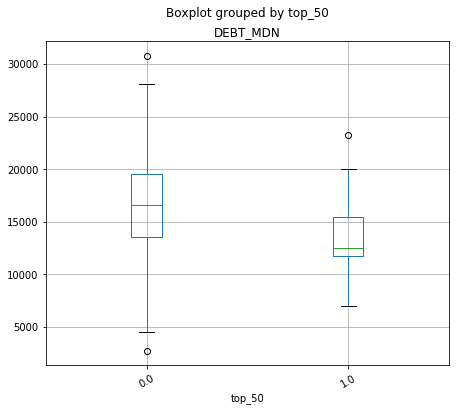

In [175]:
loan_df.boxplot('DEBT_MDN','top_50',rot = 30,figsize=(7,6))

In [49]:
testloan_df = loan_df.copy()
testloan_df.describe()

,ADM_RATE_ALL,PCTPELL,AGE_ENTRY,PCPSYCH,PCARCH,PCEDU,PCENG_TECH,PCLEGAL,PCMATH,PCSCI,...,TUITIONFEE_OUT,SAT_AVG_ALL,PAR_ED_PCT_1STGEN,DEBT_MDN,ENDOWSTUD,top_50,FOUR_YEAR_INST,TWO_YEAR_INST,LESS_THAN_TWO_YEAR_INST,AVG_TUITIONFEE_IN_OUT
count,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,...,1305.000000,1305.000000,1305.000000,1305.000000,1.305000e+03,1305.000000,1305.000000,1305.000000,1305.0,1305.000000
mean,0.654213,0.358490,22.266732,0.063754,0.003064,0.055829,0.009114,0.002110,0.011162,0.000202,...,26245.864368,1062.253640,0.316238,16561.608812,4.046700e+04,0.016092,0.973180,0.026820,0.0,23885.227969
std,0.188584,0.141434,2.297537,0.050029,0.017346,0.056959,0.027029,0.008743,0.012790,0.002751,...,10685.984830,132.724815,0.094546,4417.640551,1.655114e+05,0.125877,0.161619,0.161619,0.0,11769.568452
min,0.048140,0.056900,19.256000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3868.000000,712.000000,0.088670,2750.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,2488.000000
25%,0.542096,0.260400,20.528764,0.034000,0.000000,0.002200,0.000000,0.000000,0.002100,0.000000,...,17811.000000,972.000000,0.251634,13320.500000,0.000000e+00,0.000000,1.000000,0.000000,0.0,13846.000000
50%,0.663398,0.348600,21.827080,0.056600,0.000000,0.045500,0.000000,0.000000,0.007900,0.000000,...,25324.000000,1047.000000,0.322222,16512.000000,0.000000e+00,0.000000,1.000000,0.000000,0.0,21766.000000
75%,0.779585,0.441200,23.378539,0.085000,0.000000,0.083900,0.000000,0.000000,0.015400,0.000000,...,32739.000000,1122.000000,0.379420,19500.000000,2.176387e+04,0.000000,1.000000,0.000000,0.0,31570.000000
max,1.000000,0.928400,33.822910,0.535700,0.306600,0.556900,0.279400,0.159500,0.100100,0.076800,...,55056.000000,1519.000000,0.615339,30750.000000,2.951077e+06,1.000000,1.000000,1.000000,0.0,55056.000000


In [50]:
std = StandardScaler()

X = testloan_df.loc[:,['AVG_TUITIONFEE_IN_OUT', 'SAT_AVG_ALL', 
                    'FOUR_YEAR_INST', 'PCART', 'PCARCH', 
                    'PCMATH', 'PCHEALTH', 'PCBUS','PCPSYCH','ADM_RATE_ALL',
                    'PCLEGAL','ENDOWSTUD','PCSCI','top_50','PCEDU','PCENG_TECH','TWO_YEAR_INST','AGE_ENTRY','PCTPELL',
                    'PUB_PRIV','PAR_ED_PCT_1STGEN']]

y = testloan_df['DEBT_MDN']

transform_X = std.fit_transform(X.values)

model = sm.OLS(y,sm.add_constant(transform_X))

fit = model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               DEBT_MDN   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     55.92
Date:                Thu, 10 Oct 2019   Prob (F-statistic):          1.21e-158
Time:                        22:55:23   Log-Likelihood:                -12396.
No. Observations:                1305   AIC:                         2.483e+04
Df Residuals:                    1284   BIC:                         2.494e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.656e+04     90.095    183.823      0.000    1.64e+04    1.67e+04
x1          2859.6507    188.772     15.149      0.000    2489.316    3229.986
x2          -424.8067    180.359     -2.355      0.019    -778.638     -70.975
x3           203.1278     48.524      4.186      0.000     107.933     298.322
x4           108.4925    100.909      1.075      0.283     -89.472     306.457
x5           264.3904     93.507      2.827      0.005      80.947     447.834
x6            56.5304    113.042      0.500      0.617    -165.236     278.297
x7           939.9105    113.650      8.270      0.000     716.951    1162.870
x8           314.1102    105.766      2.970      0.003     106.617     521.603
x9           147.8290    100.015      1.478      0.140     -48.382     344.040
x10          282.1947    109.318      2.581      0.010      67.733     496.656
x11          -61.7273     91.215     -0.677      0.499    -240.674     117.219
x12         -894.6767    132.631     -6.746      0.000   -1154.874    -634.480
x13         -111.3570     90.651     -1.228      0.220    -289.197      66.483
x14         -169.4452    116.179     -1.458      0.145    -397.367      58.476
x15          -30.3185     98.646     -0.307      0.759    -223.844     163.207
x16           77.4216     97.563      0.794      0.428    -113.978     268.821
x17         -203.1278     48.524     -4.186      0.000    -298.322    -107.933
x18          -99.8434    126.772     -0.788      0.431    -348.547     148.860
x19          394.9758    140.222      2.817      0.005     119.886     670.065
x20          666.2234    161.155      4.134      0.000     350.068     982.379
x21        -1588.0075    163.836     -9.693      0.000   -1909.422   -1266.593
==============================================================================
Omnibus:                       18.522   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.350
Skew:                          -0.077   Prob(JB):                     2.57e-07
Kurtosis:                       3.731   Cond. No.                     6.15e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.46e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [51]:
#create a new dataframe with standardized features and regular target
newloan_df = pd.DataFrame()

newloan_df['DEBT_MDN'] = testloan_df['DEBT_MDN']

for col in range(transform_X.shape[1]):
    newloan_df[f'x_{col}'] = transform_X[:, col]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c22f14f60>,
      dtype=object)

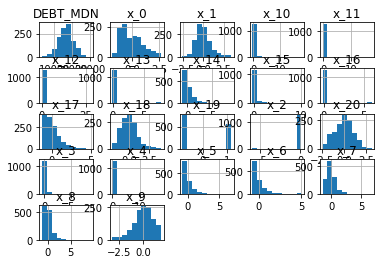

In [53]:
newloan_df.hist()

In [43]:
newloan_df.describe()

,DEBT_MDN,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20
count,1305.000000,1.305000e+03,1.305000e+03,1.305000e+03,1.305000e+03,1.305000e+03,1.305000e+03,1.305000e+03,1.305000e+03,1.305000e+03,...,1.305000e+03,1305.000000,1.305000e+03,1.305000e+03,1.305000e+03,1.305000e+03,1.305000e+03,1.305000e+03,1.305000e+03,1.305000e+03
mean,16561.608812,-7.622681e-17,5.158921e-16,3.130744e-17,5.240593e-17,-5.444772e-18,-5.989249e-17,-1.170626e-16,-4.900295e-17,-1.796775e-16,...,-1.633432e-17,0.000000,3.947460e-17,-1.442865e-16,8.167158e-18,-1.633432e-17,4.941131e-16,8.711635e-17,1.088954e-17,-1.333969e-16
std,4417.640551,1.000383e+00,1.000383e+00,1.000383e+00,1.000383e+00,1.000383e+00,1.000383e+00,1.000383e+00,1.000383e+00,1.000383e+00,...,1.000383e+00,1.000383,1.000383e+00,1.000383e+00,1.000383e+00,1.000383e+00,1.000383e+00,1.000383e+00,1.000383e+00,1.000383e+00
min,2750.000000,-1.818710e+00,-2.639958e+00,-6.023762e+00,-4.683492e-01,-1.766799e-01,-8.730443e-01,-7.782143e-01,-1.449390e+00,-1.274838e+00,...,-2.445905e-01,-0.073623,-1.278872e-01,-9.805357e-01,-3.373159e-01,-1.660092e-01,-1.310919e+00,-2.133199e+00,-8.508291e-01,-2.407886e+00
25%,13320.500000,-8.533088e-01,-6.802665e-01,1.660092e-01,-3.800503e-01,-1.766799e-01,-7.087968e-01,-7.129199e-01,-5.425551e-01,-5.949674e-01,...,-2.445905e-01,-0.073623,-1.278872e-01,-9.418969e-01,-3.373159e-01,-1.660092e-01,-7.567383e-01,-6.938103e-01,-8.508291e-01,-6.835729e-01
50%,16512.000000,-1.801290e-01,-1.149709e-01,1.660092e-01,-1.922989e-01,-1.766799e-01,-2.551606e-01,-2.916845e-01,-7.364302e-02,-1.430533e-01,...,-2.445905e-01,-0.073623,-1.278872e-01,-1.814152e-01,-3.373159e-01,-1.660092e-01,-1.914312e-01,-6.995713e-02,-8.508291e-01,6.331741e-02
75%,19500.000000,6.531861e-01,4.503247e-01,1.660092e-01,3.356035e-02,-1.766799e-01,3.314379e-01,2.768966e-01,3.969001e-01,4.248388e-01,...,-1.130454e-01,-0.073623,-1.278872e-01,4.930073e-01,-3.373159e-01,-1.660092e-01,4.840983e-01,5.850180e-01,1.175324e+00,6.685292e-01
max,30750.000000,2.649436e+00,3.442623e+00,1.660092e-01,8.826272e+00,1.750558e+01,6.956090e+00,5.000049e+00,6.705602e+00,9.437126e+00,...,1.759230e+01,27.855221,7.819390e+00,8.800347e+00,1.000363e+01,6.023762e+00,5.031741e+00,4.031064e+00,1.175324e+00,3.164774e+00


In [54]:
newloan_df.rename(
    inplace=True,
    columns={
        'x_0': 'AVG_TUITIONFEE_IN_OUT',
        'x_1': 'SAT_AVG_ALL',
        'x_2': 'FOUR_YEAR_INST',
        'x_3':'PCART',
        'x_4':'PCARCH',
        'x_5':'PCMATH',
        'x_6':'PCHEALTH',
        'x_7':'PCBUS',
        'x_8':'PCPSYCH',
        'x_9':'ADM_RATE_ALL',
        'x_10':'PCLEGAL',
        'x_11':'ENDOWSTUD',
        'x_12':'PCSCI',
        'x_13':'TOP_50',
        'x_14':'PCEDU',
        'x_15':'PCENG_TECH',
        'x_16':'TWO_YEAR_INST',
        'x_17':'AGE_ENTRY',
        'x_18':'PCTPELL',
        'x_19':'PUB_PRIV',
        'x_20':'PAR_ED_PCT_1STGEN'
    })                  

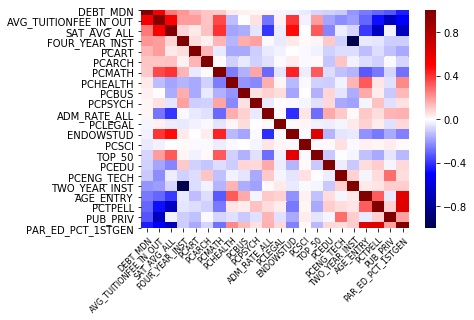

In [55]:
ax= sns.heatmap(newloan_df.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1, xticklabels=True, yticklabels=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=8, rotation_mode='anchor', ha='right')

plt.savefig('heatmap-01.svg', transparent=True, bbox_inches='tight')

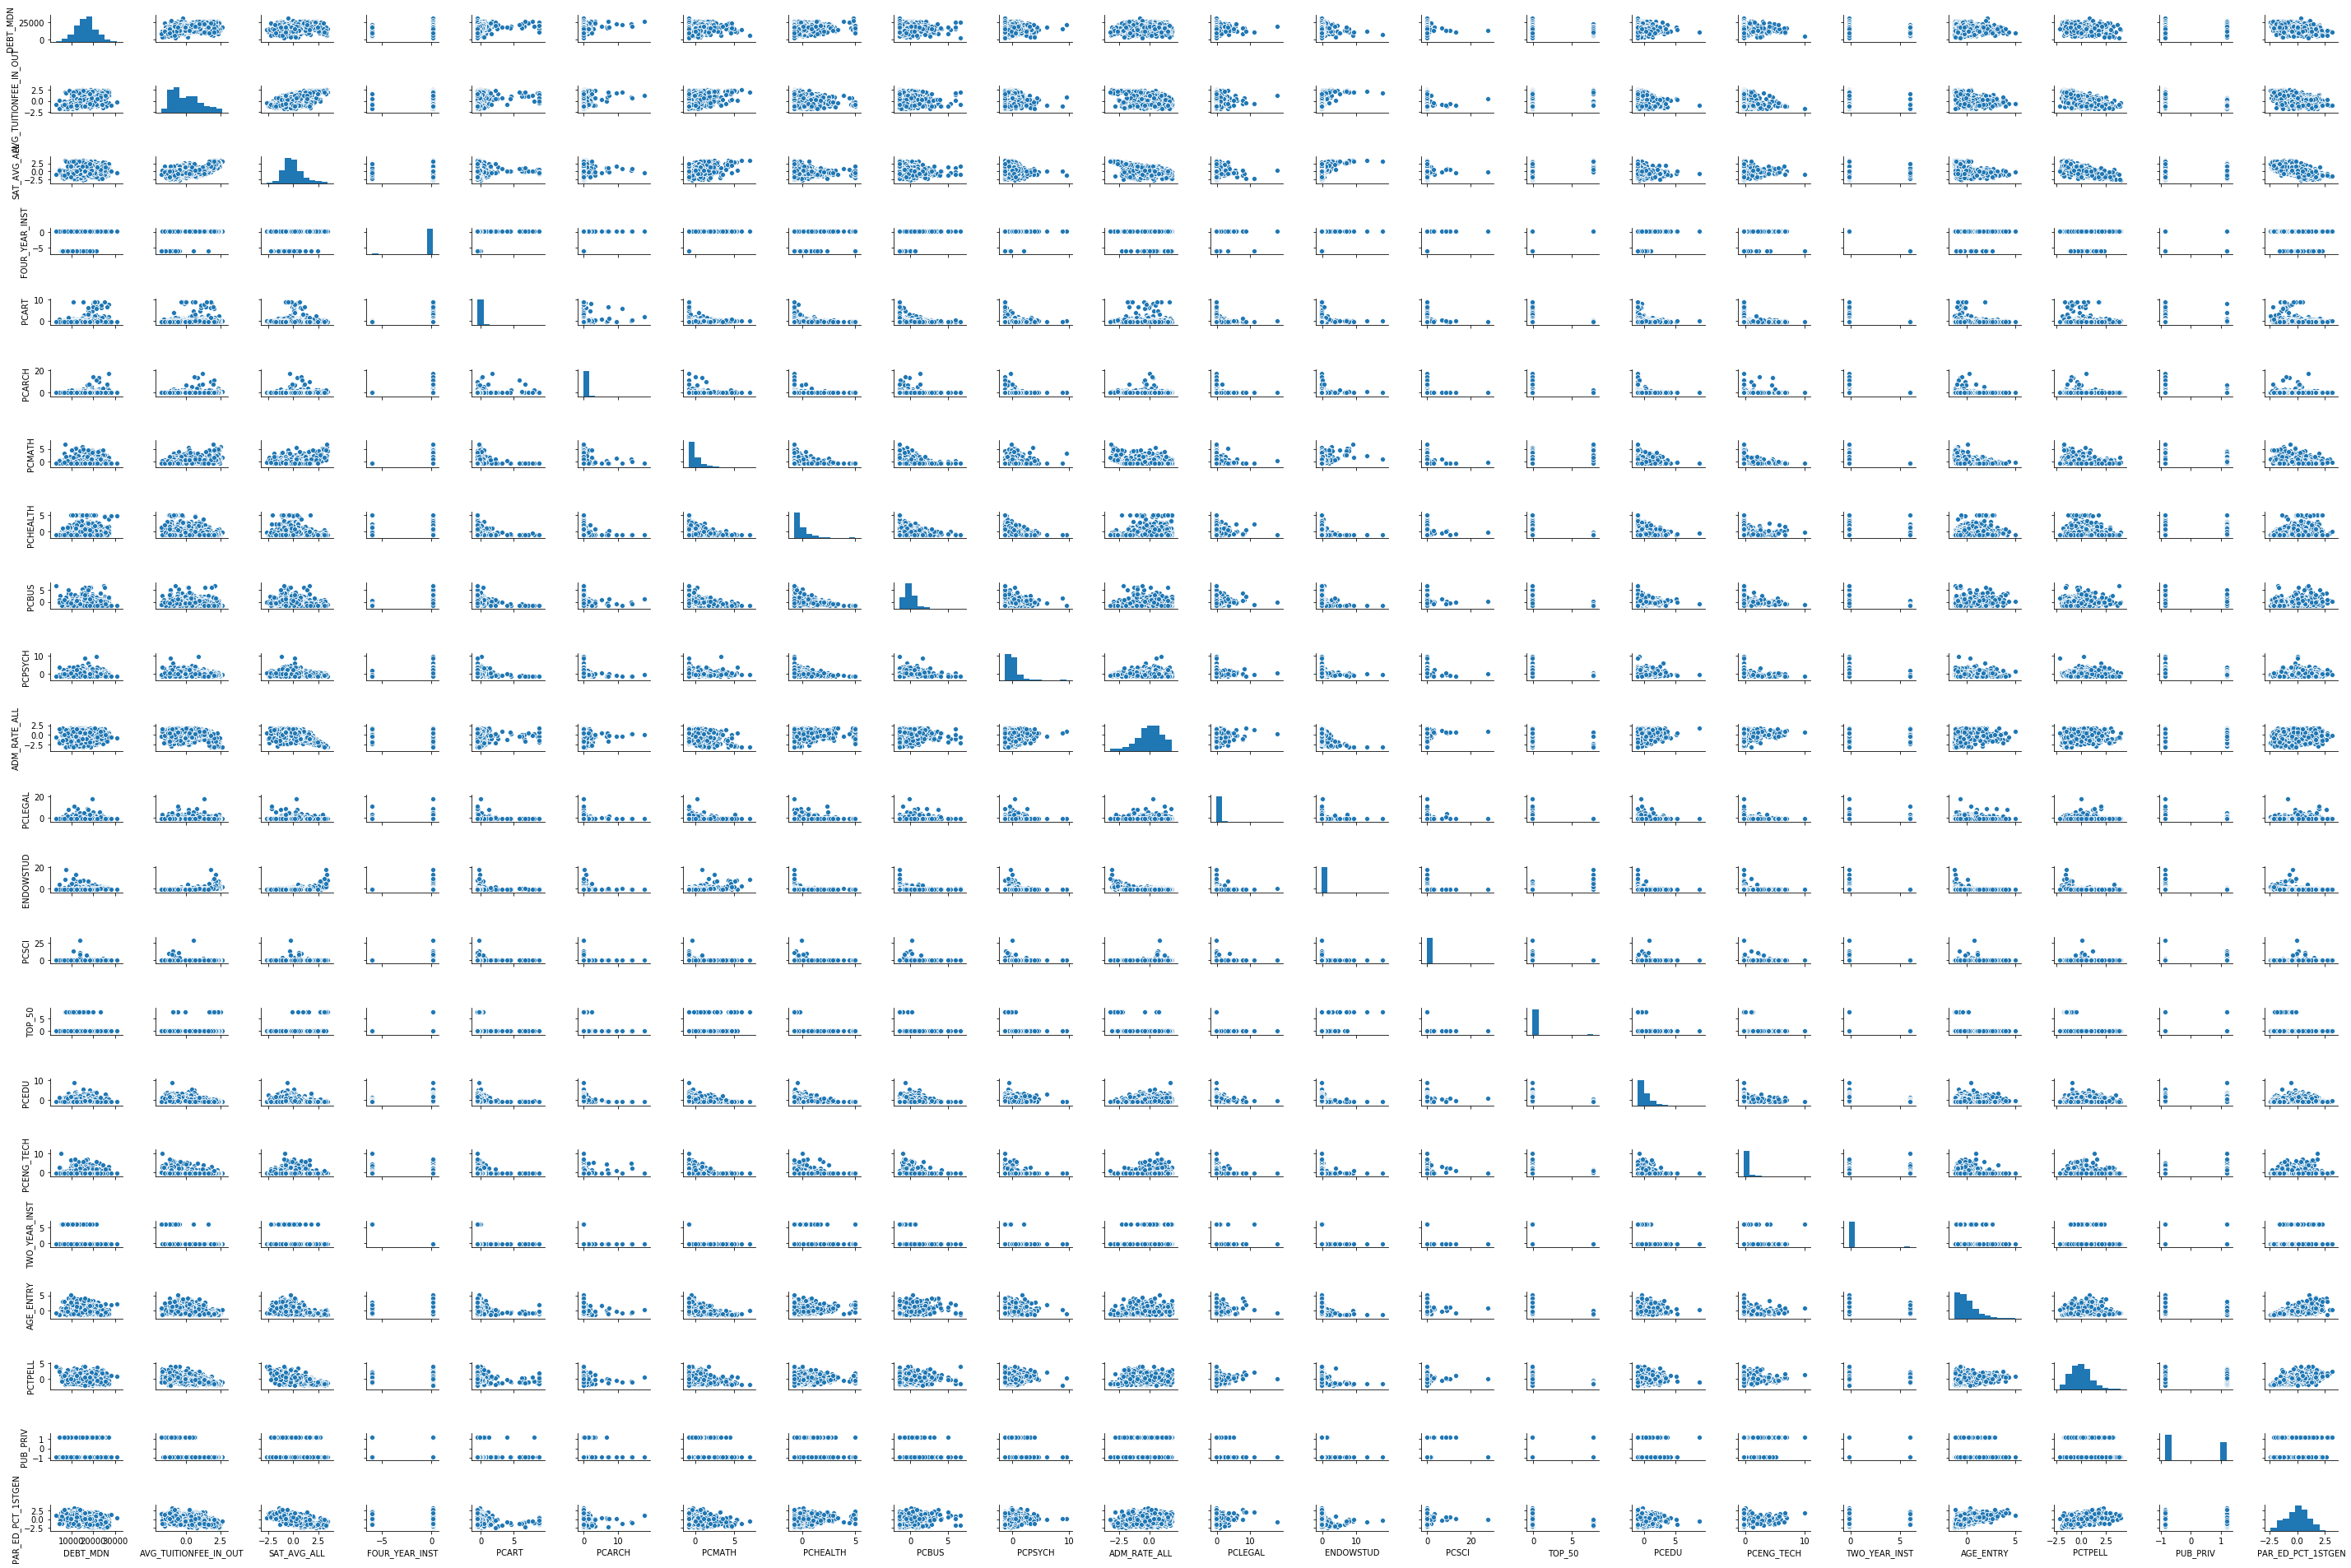

In [128]:
sns.pairplot(newloan_df, height=1.2, aspect=1.5);
plt.savefig('pair_plot.svg', transparent=True, bbox_inches='tight')

Text(0, 0.5, 'Residuals')

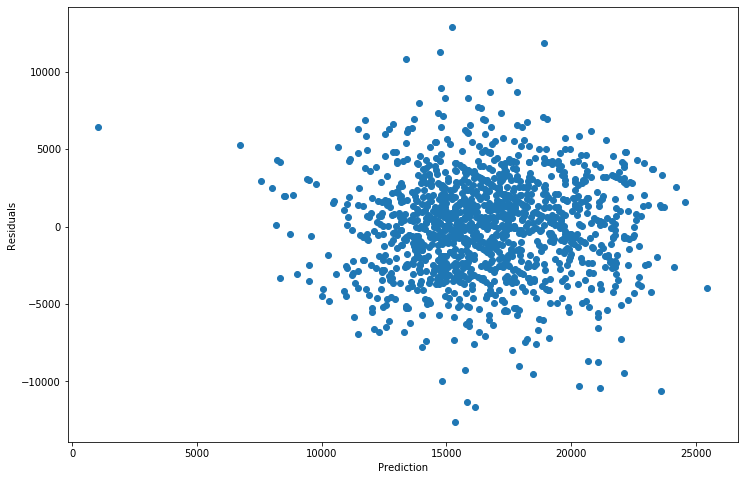

In [56]:
plt.figure(figsize=(12,8))
plt.scatter(fit.predict(), fit.resid);
plt.xlabel("Prediction")
plt.ylabel("Residuals")

In [57]:
newloan_df.corr()['DEBT_MDN'].sort_values(ascending=False)

DEBT_MDN                 1.000000
AVG_TUITIONFEE_IN_OUT    0.539205
SAT_AVG_ALL              0.259707
FOUR_YEAR_INST           0.203259
PCART                    0.141795
PCARCH                   0.116230
PCMATH                   0.106848
PCHEALTH                 0.042750
PCBUS                    0.025863
PCPSYCH                  0.020869
ADM_RATE_ALL             0.018848
PCLEGAL                 -0.018964
ENDOWSTUD               -0.027770
PCSCI                   -0.039846
TOP_50                  -0.084562
PCEDU                   -0.089371
PCENG_TECH              -0.101786
TWO_YEAR_INST           -0.203259
AGE_ENTRY               -0.260687
PCTPELL                 -0.303873
PUB_PRIV                -0.330200
PAR_ED_PCT_1STGEN       -0.445260
Name: DEBT_MDN, dtype: float64

### Standardize Features with LASSOCV

In [58]:
#Separate features from target

X2= loan_df.loc[:,['SAT_AVG_ALL', 
                    'PCART', 'PCARCH', 
                    'PCMATH', 'PCHEALTH', 'PCBUS','PCPSYCH','ADM_RATE_ALL',
                    'PCLEGAL','ENDOWSTUD','PCSCI','top_50','PCEDU','PCENG_TECH','TWO_YEAR_INST','AGE_ENTRY','PCTPELL',
                    'PUB_PRIV','PAR_ED_PCT_1STGEN','TUITIONFEE_IN','TUITIONFEE_OUT','FOUR_YEAR_INST']]

y2 = loan_df['DEBT_MDN']

In [59]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1305 entries, 0 to 6734
Data columns (total 22 columns):
SAT_AVG_ALL          1305 non-null float64
PCART                1305 non-null float64
PCARCH               1305 non-null float64
PCMATH               1305 non-null float64
PCHEALTH             1305 non-null float64
PCBUS                1305 non-null float64
PCPSYCH              1305 non-null float64
ADM_RATE_ALL         1305 non-null float64
PCLEGAL              1305 non-null float64
ENDOWSTUD            1305 non-null float64
PCSCI                1305 non-null float64
top_50               1305 non-null float64
PCEDU                1305 non-null float64
PCENG_TECH           1305 non-null float64
TWO_YEAR_INST        1305 non-null uint8
AGE_ENTRY            1305 non-null float64
PCTPELL              1305 non-null float64
PUB_PRIV             1305 non-null int64
PAR_ED_PCT_1STGEN    1305 non-null float64
TUITIONFEE_IN        1305 non-null float64
TUITIONFEE_OUT       1305 non-null fl

In [60]:
#Split the data 60 - 20 - 20 train/val/test

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2,random_state=42)

In [61]:
## Fits Standard Scaler to the training data
std = StandardScaler()
std.fit(X_train.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [62]:
#applies the scaler to the train and test set
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [64]:
X_tr = sm.add_constant(X_tr)
model_1 = sm.OLS(y_train, X_tr)
model_1_fit = model_1.fit()
model_1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               DEBT_MDN   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     40.96
Date:                Thu, 10 Oct 2019   Prob (F-statistic):          9.23e-120
Time:                        22:56:52   Log-Likelihood:                -9932.0
No. Observations:                1044   AIC:                         1.991e+04
Df Residuals:                    1022   BIC:                         2.002e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.661e+04    102.486    162.049      0.000    1.64e+04    1.68e+04
x1          -307.5043    208.814     -1.473      0.141    -717.258     102.249
x2           127.4815    116.887      1.091      0.276    -101.884     356.847
x3           245.5992    106.231      2.312      0.021      37.144     454.055
x4            69.3843    132.820      0.522      0.602    -191.246     330.015
x5           890.8452    128.461      6.935      0.000     638.768    1142.922
x6           259.3201    120.328      2.155      0.031      23.202     495.438
x7           111.0235    115.737      0.959      0.338    -116.085     338.132
x8           225.1776    125.388      1.796      0.073     -20.870     471.225
x9           -82.7893    103.726     -0.798      0.425    -286.329     120.750
x10         -997.8948    166.002     -6.011      0.000   -1323.639    -672.150
x11         -150.0639    103.097     -1.456      0.146    -352.370      52.242
x12         -183.4737    135.769     -1.351      0.177    -449.891      82.944
x13           26.2712    113.042      0.232      0.816    -195.550     248.092
x14          110.1959    112.575      0.979      0.328    -110.709     331.101
x15         -205.3042     55.958     -3.669      0.000    -315.110     -95.498
x16          -75.8234    145.851     -0.520      0.603    -362.025     210.379
x17          335.8552    160.448      2.093      0.037      21.010     650.700
x18          788.6542    268.155      2.941      0.003     262.457    1314.851
x19        -1528.2211    187.247     -8.162      0.000   -1895.653   -1160.789
x20         2014.0715    479.146      4.203      0.000    1073.850    2954.293
x21         1023.3128    355.980      2.875      0.004     324.777    1721.849
x22          205.3042     55.958      3.669      0.000      95.498     315.110
==============================================================================
Omnibus:                       13.405   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.679
Skew:                          -0.105   Prob(JB):                     5.33e-05
Kurtosis:                       3.639   Cond. No.                     5.46e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.72e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [65]:
## Helper function to calculate the mean absolute error
def mean_absolute_error(a, b):
    return np.mean(abs(a-b))

## Helper function to calcuate the mean squared error
def mean_squared_error(a, b):
    return (sum((a-b)**2))**0.5

In [155]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [156]:
# This is the best alpha value it found 
lasso_model.alpha_

28.660676169482503

In [157]:
convert_back = lasso_model.coef_

In [158]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
list(zip(X_train.columns, lasso_model.coef_))

[('SAT_AVG_ALL', -165.03886167415465),
 ('PCART', 0.0),
 ('PCARCH', 249.4520077100926),
 ('PCMATH', -0.0),
 ('PCHEALTH', 664.250595766419),
 ('PCBUS', 143.45406936889694),
 ('PCPSYCH', 107.3193049371959),
 ('ADM_RATE_ALL', 124.51686544443928),
 ('PCLEGAL', -66.96121513479353),
 ('ENDOWSTUD', -1246.138931145982),
 ('PCSCI', -164.05719158128636),
 ('top_50', 106.90696986758702),
 ('PCEDU', -9.820676595169752),
 ('PCENG_TECH', 60.198632134644434),
 ('TWO_YEAR_INST', -348.8811540097601),
 ('AGE_ENTRY', -0.0),
 ('PCTPELL', 305.9785139095461),
 ('PUB_PRIV', 345.91139566758625),
 ('PAR_ED_PCT_1STGEN', -1424.0957032765707),
 ('TUITIONFEE_IN', 1496.0443320647587),
 ('TUITIONFEE_OUT', 1161.7130167515),
 ('FOUR_YEAR_INST', 0.0)]

In [159]:
#Convert standardized features back to scale
convert = convert_back / std.scale_ #not working

In [160]:
#adding features that are back to scale coef for interpretation
list(zip(X2.columns, lasso_model.coef_,convert))

[('SAT_AVG_ALL', -165.03886167415465, -1.2702785598506723),
 ('PCART', 0.0, 0.0),
 ('PCARCH', 249.4520077100926, 13849.152049193422),
 ('PCMATH', -0.0, -0.0),
 ('PCHEALTH', 664.250595766419, 3813.2692177281147),
 ('PCBUS', 143.45406936889694, 1130.022205437012),
 ('PCPSYCH', 107.3193049371959, 2165.972344007941),
 ('ADM_RATE_ALL', 124.51686544443928, 661.7532093875591),
 ('PCLEGAL', -66.96121513479353, -8187.288841723839),
 ('ENDOWSTUD', -1246.138931145982, -0.008089076969563786),
 ('PCSCI', -164.05719158128636, -50643.65458848483),
 ('top_50', 106.90696986758702, 952.0900693611467),
 ('PCEDU', -9.820676595169752, -164.4452037468024),
 ('PCENG_TECH', 60.198632134644434, 2345.795692466291),
 ('TWO_YEAR_INST', -348.8811540097601, -2327.9427844291345),
 ('AGE_ENTRY', -0.0, -0.0),
 ('PCTPELL', 305.9785139095461, 2236.334561020208),
 ('PUB_PRIV', 345.91139566758625, 705.4210714555124),
 ('PAR_ED_PCT_1STGEN', -1424.0957032765707, -15490.873507502936),
 ('TUITIONFEE_IN', 1496.0443320647587, 0

In [161]:
std.scale_

array([1.29923362e+02, 1.15914274e-01, 1.80120781e-02, 1.27601652e-02,
       1.74194519e-01, 1.26948009e-01, 4.95478648e-02, 1.88162088e-01,
       8.17867995e-03, 1.54052055e+05, 3.23944219e-03, 1.12286614e-01,
       5.97200549e-02, 2.56623509e-02, 1.49866722e-01, 2.35245679e+00,
       1.36821440e-01, 4.90361586e-01, 9.19312718e-02, 1.35556256e+04,
       1.06099676e+04, 1.49866722e-01])

In [162]:
# Make predictions on the test set using the new model
test_set_pred = lasso_model.predict(X_te)

In [163]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

mae(y_test, test_set_pred)

2337.247027668399

In [164]:
r2_score(y_test, test_set_pred)

0.4754601260203012

### Perform Ridge Regression after Lasso

In [177]:
#Separate features from reduced list of targets from LASSO

X2 = loan_df.loc[:,['SAT_AVG_ALL', 
                    'FOUR_YEAR_INST', 'PCARCH','PCBUS','PCPSYCH',
                    'PCHEALTH','ADM_RATE_ALL', 'PCLEGAL', 'top_50','PCENG_TECH','PUB_PRIV',
                    'ENDOWSTUD','PCSCI','PCEDU','TWO_YEAR_INST','PCTPELL',
                    'PAR_ED_PCT_1STGEN','TUITIONFEE_IN','TUITIONFEE_OUT']]

y2 = loan_df['DEBT_MDN']

In [178]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1305 entries, 0 to 6734
Data columns (total 19 columns):
SAT_AVG_ALL          1305 non-null float64
FOUR_YEAR_INST       1305 non-null uint8
PCARCH               1305 non-null float64
PCBUS                1305 non-null float64
PCPSYCH              1305 non-null float64
PCHEALTH             1305 non-null float64
ADM_RATE_ALL         1305 non-null float64
PCLEGAL              1305 non-null float64
top_50               1305 non-null float64
PCENG_TECH           1305 non-null float64
PUB_PRIV             1305 non-null int64
ENDOWSTUD            1305 non-null float64
PCSCI                1305 non-null float64
PCEDU                1305 non-null float64
TWO_YEAR_INST        1305 non-null uint8
PCTPELL              1305 non-null float64
PAR_ED_PCT_1STGEN    1305 non-null float64
TUITIONFEE_IN        1305 non-null float64
TUITIONFEE_OUT       1305 non-null float64
dtypes: float64(16), int64(1), uint8(2)
memory usage: 186.1 KB


In [179]:
#Split the data 60 - 20 - 20 train/val/test
X_train_val, X_test, y_train_val, y_test = train_test_split(X2, y2, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

## Fits Standard Scaler to the training data
std.fit(X_train.values)

#applies the scaler to the train and test set
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)


In [182]:
selected_columns = ['SAT_AVG_ALL', 
                    'FOUR_YEAR_INST', 'PCARCH','PCBUS','PCPSYCH',
                    'PCHEALTH','ADM_RATE_ALL', 'PCLEGAL', 'top_50','PCENG_TECH','PUB_PRIV',
                    'ENDOWSTUD','PCSCI','PCEDU','TWO_YEAR_INST','PCTPELL',
                    'PAR_ED_PCT_1STGEN','TUITIONFEE_IN','TUITIONFEE_OUT']

In [183]:
X_train_collinear = X_train.loc[:,selected_columns]
model = sm.OLS(y_train, sm.add_constant(X_train_collinear))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               DEBT_MDN   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     33.02
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           5.75e-83
Time:                        22:46:25   Log-Likelihood:                -7446.0
No. Observations:                 783   AIC:                         1.493e+04
Df Residuals:                     764   BIC:                         1.502e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              9437.8959   1773.972      5.320      0.000    5955.458    1.29e+04
SAT_AVG_ALL          -1.9632      1.825     -1.075      0.282      -5.547       1.620
FOUR_YEAR_INST     5948.9769    933.074      6.376      0.000    4117.284    7780.670
PCARCH             1.527e+04   6805.890      2.243      0.025    1907.066    2.86e+04
PCBUS              1617.8720   1043.752      1.550      0.122    -431.091    3666.834
PCPSYCH            2842.8860   2620.098      1.085      0.278   -2300.561    7986.333
PCHEALTH           4392.3411    825.258      5.322      0.000    2772.299    6012.383
ADM_RATE_ALL        802.6269    767.357      1.046      0.296    -703.751    2309.005
PCLEGAL           -1.216e+04   1.46e+04     -0.835      0.404   -4.07e+04    1.64e+04
top_50             1936.2602   1446.314      1.339      0.181    -902.960    4775.481
PCENG_TECH         3090.4404   5002.231      0.618      0.537   -6729.309    1.29e+04
PUB_PRIV           1449.3096    618.276      2.344      0.019     235.588    2663.031
ENDOWSTUD            -0.0087      0.001     -6.804      0.000      -0.011      -0.006
PCSCI             -5.967e+04   3.66e+04     -1.628      0.104   -1.32e+05    1.23e+04
PCEDU              -380.3491   2169.699     -0.175      0.861   -4639.628    3878.930
TWO_YEAR_INST      3488.9191   1029.089      3.390      0.001    1468.742    5509.096
PCTPELL            3099.3791   1370.519      2.261      0.024     408.949    5789.809
PAR_ED_PCT_1STGEN -1.683e+04   1936.680     -8.690      0.000   -2.06e+04    -1.3e+04
TUITIONFEE_IN         0.1478      0.040      3.660      0.000       0.069       0.227
TUITIONFEE_OUT        0.0964      0.038      2.524      0.012       0.021       0.171
==============================================================================
Omnibus:                       16.825   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.719
Skew:                          -0.148   Prob(JB):                     9.57e-07
Kurtosis:                       3.873   Cond. No.                     1.33e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.14e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Text(0, 0.5, 'Residuals')

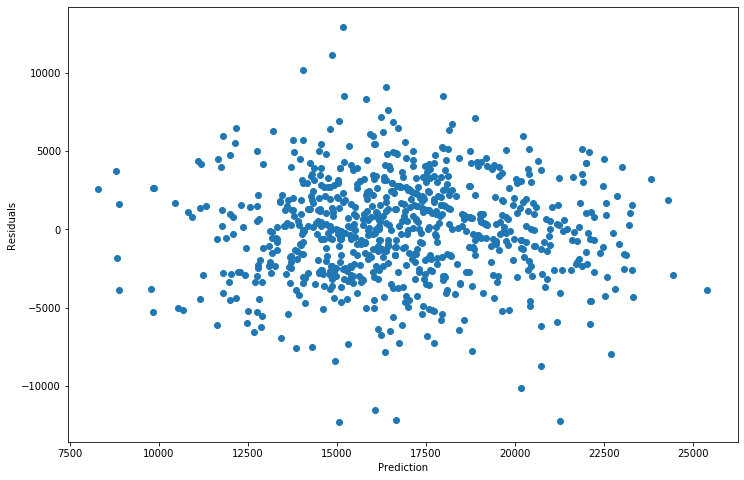

In [184]:
plt.figure(figsize=(12,8))
plt.scatter(results.predict(), results.resid);
plt.xlabel("Prediction")
plt.ylabel("Residuals")

In [185]:
lr_model_ridge = Ridge(alpha = 1000000000000)
lr_model_ridge.fit(X_train_collinear, y_train)

list(zip(X_train_collinear.columns, lr_model_ridge.coef_))

[('SAT_AVG_ALL', 0.00010320388955583667),
 ('FOUR_YEAR_INST', 8.31166276124617e-08),
 ('PCARCH', 6.812455764476648e-09),
 ('PCBUS', 4.760889901344984e-09),
 ('PCPSYCH', 4.404685784033402e-09),
 ('PCHEALTH', 4.9106013678295435e-09),
 ('ADM_RATE_ALL', -1.7401416973867927e-08),
 ('PCLEGAL', 7.552027899011439e-11),
 ('top_50', -1.796924849368309e-08),
 ('PCENG_TECH', -6.09959127964788e-09),
 ('PUB_PRIV', -4.5728136828244977e-07),
 ('ENDOWSTUD', -0.0019265033191008143),
 ('PCSCI', -5.561847653829844e-10),
 ('PCEDU', -1.8371503466691273e-08),
 ('TWO_YEAR_INST', -8.311662761246166e-08),
 ('PCTPELL', -1.2131495050769882e-07),
 ('PAR_ED_PCT_1STGEN', -1.251837193533702e-07),
 ('TUITIONFEE_IN', 0.019978080093088296),
 ('TUITIONFEE_OUT', 0.016017613070447523)]

In [186]:
X_train_collinear = X_train.loc[:,selected_columns]

In [187]:
X_train_collinear.corr()

,SAT_AVG_ALL,FOUR_YEAR_INST,PCARCH,PCBUS,PCPSYCH,PCHEALTH,ADM_RATE_ALL,PCLEGAL,top_50,PCENG_TECH,PUB_PRIV,ENDOWSTUD,PCSCI,PCEDU,TWO_YEAR_INST,PCTPELL,PAR_ED_PCT_1STGEN,TUITIONFEE_IN,TUITIONFEE_OUT
SAT_AVG_ALL,1.000000,0.039585,0.101177,-0.188162,-0.082951,-0.177272,-0.410259,0.024753,0.286213,0.014783,-0.032672,0.519843,-0.004229,-0.266139,-0.039585,-0.682666,-0.650660,0.421454,0.616551
FOUR_YEAR_INST,0.039585,1.000000,0.024833,0.137245,0.190650,-0.151461,-0.034543,0.010478,0.017447,-0.123055,-0.100077,0.041956,0.010964,0.080257,-1.000000,-0.011340,-0.077285,0.146750,0.194354
PCARCH,0.101177,0.024833,1.000000,-0.051089,-0.102741,-0.082018,-0.054599,-0.010181,0.015686,0.140773,-0.001291,0.024779,-0.010596,-0.115121,-0.024833,-0.074239,-0.065898,0.084542,0.129212
PCBUS,-0.188162,0.137245,-0.051089,1.000000,0.044380,-0.202689,0.057128,0.044907,-0.136907,-0.084765,-0.126249,-0.197553,-0.005830,0.059692,-0.137245,0.090252,0.159897,0.033084,-0.029844
PCPSYCH,-0.082951,0.190650,-0.102741,0.044380,1.000000,-0.250560,-0.061932,0.036720,-0.058975,-0.150841,-0.044672,-0.013728,-0.033268,0.089302,-0.190650,0.155351,0.047504,0.061341,0.051824
PCHEALTH,-0.177272,-0.151461,-0.082018,-0.202689,-0.250560,1.000000,0.163723,-0.028036,-0.083263,-0.031152,-0.059825,-0.161336,-0.020348,-0.092307,0.151461,0.053182,0.258419,-0.113050,-0.216636
ADM_RATE_ALL,-0.410259,-0.034543,-0.054599,0.057128,-0.061932,0.163723,1.000000,-0.020860,-0.261769,0.056644,0.115606,-0.443338,0.051708,0.187263,0.034543,0.074884,0.167947,-0.266441,-0.310859
PCLEGAL,0.024753,0.010478,-0.010181,0.044907,0.036720,-0.028036,-0.020860,1.000000,-0.025153,-0.034526,-0.046250,0.024665,-0.012277,-0.011525,-0.010478,0.003634,0.007285,0.076917,0.078947
top_50,0.286213,0.017447,0.015686,-0.136907,-0.058975,-0.083263,-0.261769,-0.025153,1.000000,0.000764,-0.046923,0.668718,-0.008130,-0.091370,-0.017447,-0.157373,-0.100673,0.153845,0.176021
PCENG_TECH,0.014783,-0.123055,0.140773,-0.084765,-0.150841,-0.031152,0.056644,-0.034526,0.000764,1.000000,0.280928,-0.034524,0.050126,-0.086595,0.123055,0.055667,0.039394,-0.215476,-0.163422


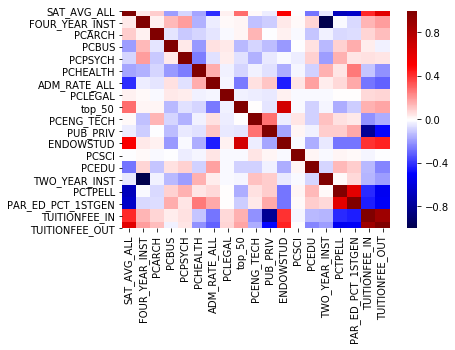

In [188]:
sns.heatmap(X_train_collinear.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1);

### Log Price - N/A made OLS Regression model worse

In [74]:
# #take log of price as target and graph.  Call this log_price.
# loan_df['log_loan']= np.log(loan_df.DEBT_MDN)
# loan_df.log_loan.hist();
# #seaborn, can look at curve instead of overall bins.

In [75]:
# # model with statsmodels using all variables above .10 correlation
# y, X = patsy.dmatrices('log_loan ~ TUITIONFEE_IN + TUITIONFEE_OUT + SAT_AVG_ALL + FOUR_YEAR_INST + PCART + PCARCH + PCMATH + PCENG_TECH + TWO_YEAR_INST + AGE_ENTRY + PCTPELL + PUB_PRIV + PAR_ED_PCT_1STGEN', data=loan_df, return_type ="dataframe")

# # Create your model
# model = sm.OLS(y, X)

# # Fit your model to your training set
# fit = model.fit()

In [76]:
#fit.summary()

In [77]:
#loan_df.tail()

### Cross Validation w/ KFold

In [189]:
#don't select object types
loan_df2 = loan_df.select_dtypes(exclude=['object']).copy()

In [190]:
loan_df2.head()

,ADM_RATE_ALL,PCTPELL,AGE_ENTRY,PCPSYCH,PCARCH,PCEDU,PCENG_TECH,PCLEGAL,PCMATH,PCSCI,...,TUITIONFEE_OUT,SAT_AVG_ALL,PAR_ED_PCT_1STGEN,DEBT_MDN,ENDOWSTUD,top_50,FOUR_YEAR_INST,TWO_YEAR_INST,LESS_THAN_TWO_YEAR_INST,AVG_TUITIONFEE_IN_OUT
0,0.873775,0.7039,20.283741,0.0472,0.0071,0.1132,0.0472,0.0,0.0024,0.0,...,17496.0,849.0,0.365828,13246.0,10416.07,0.0,1,0,0,13431.0
1,0.581351,0.3525,23.607975,0.0766,0.0000,0.0748,0.0000,0.0,0.0090,0.0,...,18368.0,1125.0,0.341224,14979.5,0.00,0.0,1,0,0,13204.0
3,0.762816,0.2949,22.727920,0.0160,0.0000,0.0282,0.0000,0.0,0.0132,0.0,...,20612.0,1257.0,0.310132,13522.0,0.00,0.0,1,0,0,15227.0
4,0.458964,0.7815,20.130990,0.0503,0.0000,0.1364,0.0000,0.0,0.0146,0.0,...,16156.0,825.0,0.343434,15738.0,0.00,0.0,1,0,0,12688.0
5,0.525852,0.1938,21.137701,0.0360,0.0000,0.0782,0.0000,0.0,0.0090,0.0,...,26950.0,1202.0,0.225713,17340.0,0.00,0.0,1,0,0,18710.0


In [191]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

X3, y3 = loan_df2.drop(['DEBT_MDN','LESS_THAN_TWO_YEAR_INST','AVG_TUITIONFEE_IN_OUT','AGE_ENTRY','PCENG_TECH','PCLEGAL','PCMATH','SAT_AVG_ALL','top_50','PCBUS'],axis=1), loan_df2['DEBT_MDN']

# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X3, y3, test_size=.2, random_state=10)

#this helps with the way kf will generate indices below
X3, y3 = np.array(X3), np.array(y3)

In [192]:
X_train, X_val, y_train, y_val = train_test_split(X3, y3, test_size=.25, random_state=3)
#25% of 80% for validation, remaining 75% is for training. 

In [193]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X3)
X_test_scaled = scaler.transform(X_test)

lm_reg = Ridge(alpha=1)
lm_reg.fit(X_scaled,y3)
print(f'Ridge Regression test R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')

Ridge Regression test R^2: 0.479


In [83]:
# model = sm.OLS(y_test,X_scaled)

# fit = model.fit()

# fit.summary()

In [84]:
# from sklearn.model_selection import cross_val_score
# lm = LinearRegression()

# cross_val_score(lm, X, y, # estimator, features, target
#                 cv=5, # number of folds 
#                 scoring='r2') # scoring metric

In [194]:
#kfold with cv = kf better - so don't get lucky on the above code
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
lm = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cross_val_score(lm, X3, y3, cv=kf, scoring='r2')

array([0.37932772, 0.40693486, 0.46024305, 0.39472142, 0.53639579])

In [195]:
kf = KFold(n_splits=5, shuffle=True, random_state = 1000)

print(np.mean(cross_val_score(lm, X3, y3, cv=kf, scoring='r2')))
print(np.mean(cross_val_score(lm_reg, X3, y3, cv=kf, scoring='r2')))

0.43753936617915523
0.4347062578245325


In [196]:
## Helper function to calculate the mean absolute error
def mean_absolute_error(a, b):
    return np.mean(abs(a-b))

## Helper function to calcuate the mean squared error
def mean_squared_error(a, b):
    return (sum((a-b)**2))**0.5

In [ ]:
## First test the first model on the test set, dropping columns to fit its features
X_1_test = X_test[['imdbRating', 'Metacritic', 'Rating', 'userRating']]
y_pred_1 = model_1_fit.predict(sm.add_constant(X_1_test))
## Then calculate their Mean Absolute Error (MAE) and Mean Squared Errors (MSE)
print 'MAE:', mean_absolute_error(y_pred_1, y_test)
print 'MSE:', mean_squared_error(y_pred_1, y_test)